Hand-drawn Circuit Component Recognition <br>
Author: Apurva Umredkar<br><br>
Step 1: Dataset generation with original files



In [3]:
# importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage import transform
from scipy import ndimage
from skimage.util import random_noise
from skimage.io import imsave
from IPython.display import clear_output


original image resolution:  (1998, 1998, 3)


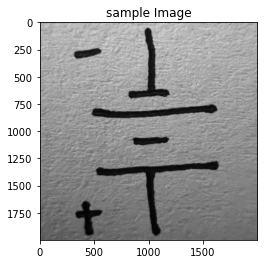

In [4]:
# plotting a sample image
component = "battery"
# reading as grayscale image
img = cv2.imread(f"./original_images/{component}/{component} (10).jpg")
plt.imshow(img)
plt.title("sample Image")
print("original image resolution: ", img.shape)


In [5]:
def thresholdImage(img):
    w = img.shape[1]
    blockSize = w//5
    if blockSize % 2 == 0: blockSize+=1
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, blockSize, 16)
    

In [6]:
# downsizing image resolution
def resizeImage(img):
    WIDTH = HEIGHT = 84
    return cv2.resize(img, (WIDTH, HEIGHT), interpolation=cv2.INTER_AREA)

In [7]:
# listing available components
components = []
for file in os.listdir("./original_images"):
    components.append(file)
print(components)

['battery', 'capacitor', 'diode', 'ground', 'inductor', 'led', 'mosfet', 'resistor', 'switch', 'transistor']


In [8]:
# applying thresholding and downsizing to all images
# and saving all images
for x in components:
    if not os.path.exists(f"./dataset/{x}"):
        os.makedirs(f"./dataset/{x}")
    path = f"./original_images/{x}"
    i = 1
    for file in os.listdir(path):
        img_path = path+"/"+file
        img = cv2.imread(img_path,0)    # read as grayscale
        img = thresholdImage(img)
        img = resizeImage(img)
        cv2.imwrite(f"./dataset/{x}/{x}{i}.png", img)
        i += 1


Step 2: Augmenting the dataset to increase the size

In [9]:
# let's check current size of our dataset
def current_image_count(dir):
    print("Image Count")
    sum = 0
    for file in os.listdir(dir):
        count = 0
        for subfile in os.listdir(f"./dataset/{file}"):
            count += 1
        print(f"-{file}: {count}")
        sum += count
    print("Total: ", sum)

current_image_count("./original_images")


Image Count
-battery: 69
-capacitor: 69
-diode: 69
-ground: 66
-inductor: 70
-led: 66
-mosfet: 65
-resistor: 72
-switch: 68
-transistor: 68
Total:  682


In [10]:
def get_last_num(subfile):
    count = 0
    for file in os.listdir(f"./dataset/{subfile}"):
        count += 1
    return count


In [11]:
# augmentation step 1: flipping images horizontally
for x in components:
    path = f"./dataset/{x}"
    i = get_last_num(x)+1
    for file in os.listdir(path):
        img_path = path+"/"+file
        img = cv2.imread(img_path,0)
        img1 = cv2.flip(img, 1)
        cv2.imwrite(f"./dataset/{x}/{x}{i}.png", img1)
        i += 1

current_image_count("./dataset")


Image Count
-battery: 138
-capacitor: 138
-diode: 138
-ground: 132
-inductor: 140
-led: 132
-mosfet: 130
-resistor: 144
-switch: 136
-transistor: 136
Total:  1364


In [12]:
# augmentation step 2: rotating all images by 10, 30, -10, -30 degrees clockwise and anti-clockwise
# including the vertically & horizontally flipped images
for x in components:
    path = f"./dataset/{x}"
    i = get_last_num(x)+1
    for file in os.listdir(path):
        img_path = path+"/"+file
        img = cv2.imread(img_path,0)
        img1 = ndimage.rotate(img, 10, reshape=False)
        img2 = ndimage.rotate(img, 30, reshape=False)
        img3 = ndimage.rotate(img, -10, reshape=False)
        img4 = ndimage.rotate(img, -30, reshape=False)
        imsave(f"./dataset/{x}/{x}{i}.png", img1)
        imsave(f"./dataset/{x}/{x}{i+1}.png", img2)
        imsave(f"./dataset/{x}/{x}{i+2}.png", img3)
        imsave(f"./dataset/{x}/{x}{i+3}.png", img4)
        i += 4
        
clear_output()
current_image_count("./dataset")


Image Count
-battery: 690
-capacitor: 690
-diode: 690
-ground: 660
-inductor: 700
-led: 660
-mosfet: 650
-resistor: 720
-switch: 680
-transistor: 680
Total:  6820


In [13]:
# augmentation step 3: adding noise to all the images
for x in components:
    path = f"./dataset/{x}"
    i = get_last_num(x)+1
    for file in os.listdir(path):
        img_path = path+"/"+file
        img = cv2.imread(img_path,0)
        img1 = random_noise(img, mode="gaussian")
        img1 = (255*img1).astype(np.uint8) 
        img2 = random_noise(img, mode="s&p")
        img2 = (255*img2).astype(np.uint8)
   
        
        imsave(f"./dataset/{x}/{x}{i}.png", img1)
        imsave(f"./dataset/{x}/{x}{i+1}.png", img2)

        i += 2
        
clear_output()
current_image_count("./dataset")


Image Count
-battery: 2070
-capacitor: 2070
-diode: 2070
-ground: 1980
-inductor: 2100
-led: 1980
-mosfet: 1950
-resistor: 2160
-switch: 2040
-transistor: 2040
Total:  20460
